# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

from mpl_toolkits import mplot3d

# Aminoacid dataset

## Load data

In [2]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)

## Create a mask 
The mask removes about 50% of the values

Text(0.5,0.98,'Mask')

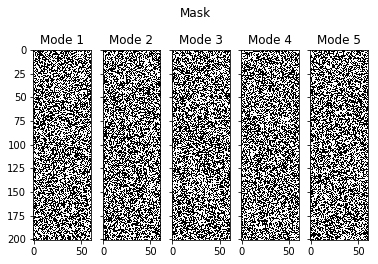

In [3]:
W = np.round(np.random.random(X.shape)).astype(np.int)

fig, axes = plt.subplots(1, 5, sharey=True, sharex=True)

# Let's display the mask
for i, ax in enumerate(axes):
    ax.imshow(W[i,...], cmap='gray')
    ax.set_title(f'Mode {i+1}')
    
fig.suptitle("Mask")

In [26]:
X_masked = np.ma.MaskedArray(X.copy(), mask=(W==0))
X_masked[W==0] = np.nan

## Plot the masked data

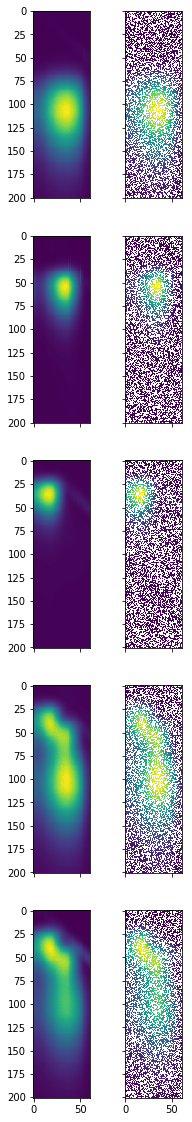

In [27]:
fig, axes = plt.subplots(5, 2, sharey=True, sharex=True, figsize=(3,20))
for i, ax in enumerate(axes):
    ax[0].imshow(X[i,...])
    ax[1].imshow(X_masked[i,...])

## Find parafac decomposition of masked values with cp_wopt

In [28]:
factors, result, initial_factors = cp.cp_wopt(X_masked, W=W, rank=3, init='random', gtol=1e-5)

In [29]:
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Optimization terminated successfully.
F(x): 0.0003137312420869495
Number of iterations: 0
Number of function evaluations: 1


# Reconstruct the data from the factors

In [30]:
X_hat = base.ktensor(*tuple(factors))

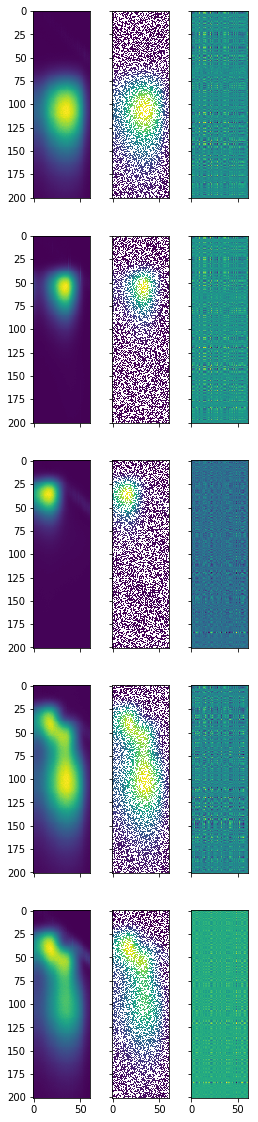

In [31]:
fig, axes = plt.subplots(5, 3, sharey=True, sharex=True, figsize=(4,20))
for i, ax in enumerate(axes):
    ax[0].imshow(X[i,...])
    ax[1].imshow(X_masked[i,...])
    ax[2].imshow(X_hat[i,...])

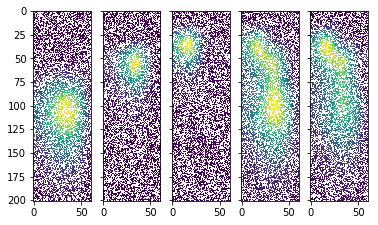

In [32]:
fig, axes = plt.subplots(1, 5, sharey=True, sharex=True)
X_masked = X
X_masked[W==0] = np.nan
for i, ax in enumerate(axes):
    ax.imshow(X[i,...])

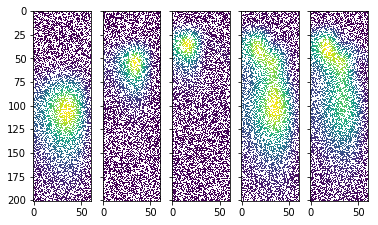

In [15]:
X_hat = base.ktensor(*tuple(factors))
fig, axes = plt.subplots(1, 5, sharey=True, sharex=True)
for i, ax in enumerate(axes):
    ax.imshow(X[i,...])

In [11]:
X.shape

(5, 201, 61)

In [12]:
x = range(X.shape[1])
y = range(X.shape[2])
X1, Y1 = np.meshgrid(y, x)

print(X1.shape)
print(Y1.shape)
print(X_hat[0,...].shape)

(201, 61)
(201, 61)
(201, 61)


(0, 0.014)

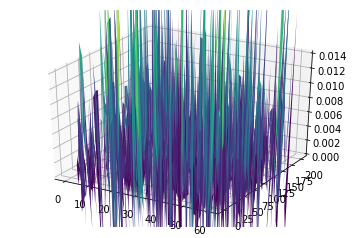

In [13]:
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
%matplotlib inline

W1 = W[0,...]
fig = plt.figure()


#ax = plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1, projection='3d')

Z = X_hat[0]
mymap = cm.viridis
mymap.set_under('k', alpha=0)

#X1[W1==0] =0 
#Y1[W1==0] = -1000
Z[W1==0] = -1000

mode = 0
ax.plot_trisurf(X1.ravel(), Y1.ravel(), Z.ravel(), vmin=0.0, linewidth=0, antialiased=True, cmap=mymap)
ax.set_zlim([0, 0.014])


Text(0.5,1,'Estimated missing values')

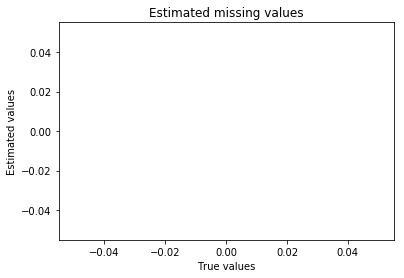

In [33]:
plt.plot(X[W==0], X_hat[W==0], 'o')
plt.xlabel("True values")
plt.ylabel("Estimated values")
plt.title("Estimated missing values")